# 1. Neighbour Identification
Identify neighbouring polling units based on geographical proximity. Define a radius (e.g., 1 km) to determine which units are considered neighbours.
#### Steps:
- Geographical Coordinates Data: Ensure each polling unit has latitude and longitude coordinates.
- Distance Calculation: Use the geodesic distance formula to calculate the distance between each polling unit and all other units.
- Neighbour Identification: For each polling unit, identify its neighbours within a predefined radius (e.g., 1 km).

# 2. Outlier Score Calculation
For each polling unit, compare the votes each party received with those of its neighbouring units.
- Calculate an outlier score for each party based on the deviation of votes from neighbouring units.
- Record the outlier scores along with the respective parties and neighbouring units.
#### Steps:
- Aggregate Votes for Neighbours: For each polling unit, sum the votes for each party from its neighbouring units.
Outlier Score Calculation: Calculate the outlier score as the absolute difference between the unit’s votes and the average votes of its neighbours for each party.

# 3. Sorting and Reporting
Sort the dataset by the outlier scores for each party to identify the most significant outliers.
Provide a detailed report explaining the methodology and findings.
Highlight the top 3 outliers and their closest polling units, explaining why they are considered outliers.
#### Steps:
- Sorting: Sort the dataset by the outlier scores in descending order for each party.
- Report Generation: Create a detailed report explaining the methodology, highlighting the top 3 outliers, and providing insights into why they are considered outliers.
- Visualization: Use maps and charts to visualize the results.

In [25]:
import pandas as pd
import numpy as np
from scipy.spatial import KDTree

# Load polling units data
file_path = 'Edo election sheet.csv'  # Update with your file path
data = pd.read_csv(file_path, encoding='latin1')

# Function to find neighbours using KD-Tree
def find_neighbours_optimized(data, radius_km=1):
    coordinates = data[['Latitude', 'Longitude']].values
    tree = KDTree(coordinates)
    neighbours = {}

    for i, row in data.iterrows():
        unit_id = row['PU-Code']
        unit_location = (row['Latitude'], row['Longitude'])
        indices = tree.query_ball_point(unit_location, radius_km / 6371)  # Earth's radius in km
        neighbours[unit_id] = data.iloc[indices]['PU-Code'].tolist()
        neighbours[unit_id].remove(unit_id)  # Remove self from neighbours

    return neighbours

neighbours_optimized = find_neighbours_optimized(data, radius_km=1)

# Function to calculate outlier scores
def calculate_outlier_scores(data, neighbours):
    parties = ['APC', 'LP', 'PDP', 'NNPP']
    outlier_scores = []

    for i, row in data.iterrows():
        unit_id = row['PU-Code']
        neighbour_ids = neighbours[unit_id]
        neighbour_votes = data[data['PU-Code'].isin(neighbour_ids)]

        for party in parties:
            unit_votes = row[party]
            if not neighbour_votes.empty:
                avg_neighbour_votes = neighbour_votes[party].mean()
                outlier_score = abs(unit_votes - avg_neighbour_votes)
            else:
                outlier_score = np.nan

            outlier_scores.append({
                'unit_id': unit_id,
                'party': party,
                'outlier_score': outlier_score,
                'neighbours': neighbour_ids
            })

    return pd.DataFrame(outlier_scores)

outlier_scores_optimized = calculate_outlier_scores(data, neighbours_optimized)

# Merge outlier scores with original data
data_with_outliers = data.copy()

for party in ['APC', 'LP', 'PDP', 'NNPP']:
    outlier_scores_party = outlier_scores_optimized[outlier_scores_optimized['party'] == party][['unit_id', 'outlier_score']]
    outlier_scores_party.rename(columns={'outlier_score': f'{party}_outlier_score'}, inplace=True)
    data_with_outliers = pd.merge(data_with_outliers, outlier_scores_party, left_on='PU-Code', right_on='unit_id', how='left')
    data_with_outliers.drop(columns=['unit_id'], inplace=True)

# Save the dataset to an Excel file
data_with_outliers.to_excel('sorted_outliers.xlsx', index=False)

# Create a sorted list of polling units by outlier scores for each party
sorted_list = {}
for party in ['APC', 'LP', 'PDP', 'NNPP']:
    sorted_list[party] = outlier_scores_optimized[outlier_scores_optimized['party'] == party].sort_values(by='outlier_score', ascending=False)

# Save the sorted lists to separate sheets in the Excel file
with pd.ExcelWriter('sorted_outliers.xlsx', mode='a', engine='openpyxl') as writer:
    for party, df in sorted_list.items():
        df.to_excel(writer, sheet_name=f'Sorted_{party}', index=False)


Visualization

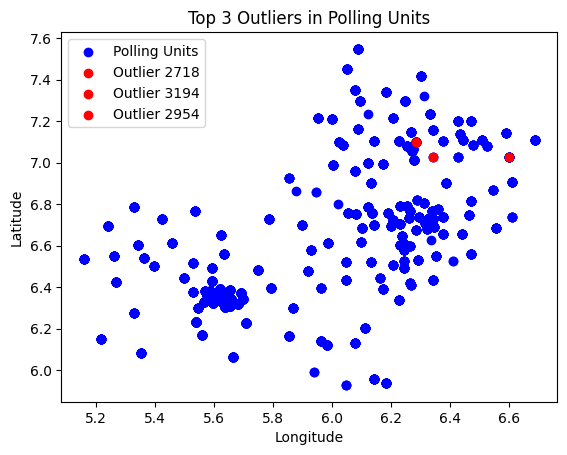

In [28]:
import matplotlib.pyplot as plt

# Scatter plot of polling units
plt.scatter(data['Longitude'], data['Latitude'], c='blue', label='Polling Units')

# Highlight top 3 outliers
for i, outlier in top_3_outliers_optimized.iterrows():
    outlier_unit = data[data['PU-Code'] == outlier['unit_id']]
    plt.scatter(outlier_unit['Longitude'], outlier_unit['Latitude'], c='red', label=f'Outlier {i+1}')

plt.legend()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Top 3 Outliers in Polling Units')
plt.show()


# Case Study: Ensuring Election Integrity

In the recently concluded election, the Independent National Electoral Commission (INEC) has faced multiple legal challenges concerning the integrity and accuracy of the election results. Allegations of vote manipulation and irregularities have been widespread, prompting a thorough investigation into the matter.
Your mission, should you choose to accept it, is to help us uncover potential voting irregularities and ensure the transparency of the election results. You will achieve this by identifying outlier polling units where the voting results deviate significantly from neighbouring units, indicating potential influences or rigging. Your keen analytical skills and attention to detail will be critical in this endeavour.

## Task Overview
In this stage, you will focus on identifying outlier polling units based on the votes each party received. The analysis will involve geospatial techniques to find neighbouring polling units and calculate an outlier score for each party in each unit. The goal is to pinpoint polling units where the voting results significantly deviate from their neighbours, indicating potential irregularities or influences.

## Task Objectives
### 1. Dataset Preparation:
- Open the [drive link](https://drive.google.com/drive/folders/173oHgms6wYy5WKz_i3Lhl5mXcmobCWHz) and find your state of origin. If you are not a Nigerian, pick a random state.

- Download the {YOUR_SELECTED_STATE}_crosschecked spreadsheet or CSV file.
- If your selected dataset does not include longitude and latitude values for each polling unit or ward, use geocoding techniques to obtain them.

### 2. Neighbour Identification:
- Identify neighbouring polling units based on geographical proximity. Define a radius (e.g., 1 km) to determine which units are considered neighbours.

### 3. Outlier Score Calculation:
- For each polling unit, compare the votes each party received with those of its neighbouring units.
- Calculate an outlier score for each party based on the deviation of votes from neighbouring units.
- Record the outlier scores along with the respective parties and neighbouring units.

### 3. Sorting and Reporting:
- Sort the dataset by the outlier scores for each party to identify the most significant outliers.
- Provide a detailed report explaining the methodology and findings.
- Highlight the top 3 outliers and their closest polling units, explaining why they are considered outliers.
  
#### Tips
5. You can use geocoding techniques such as Google Maps Geocoding API or OpenCage Geocoding API, and add the geospatial data to the dataset.
6. You can use geodesic distance to calculate the distance between each polling unit and all other units, and set a predefined radius (e.g., 1km).
6. For each polling unit, calculate the difference in votes for each party compared to the votes of its neighbouring units and calculate an outlier score for each party as the absolute difference between the unit’s votes and the votes of its neighbours.
7. Visualize the results using maps and charts where appropriate.